In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import xgboost as xgb  

In [88]:
# Load the cleaned dataset
file_path = 'cleaned_size_chart_data.csv'
data = pd.read_csv(file_path)

In [90]:
# Select specific columns for Model 2.0
selected_features = ['Height (cm)', 'Weight (kg)', 'Chest (cm)', 'Waist (cm)', 'Hip (cm)', 'Size Purchased']
target = 'Size Exchanged'

In [91]:
# Drop other columns not required for Model 2.0
data = data[selected_features + [target]]
data.head()

,Height (cm),Weight (kg),Chest (cm),Waist (cm),Hip (cm),Size Purchased,Size Exchanged
0,188,74,82,87,90,S,XL
1,164,67,82,76,90,L,S
2,157,60,104,68,102,XS,M
3,170,78,84,80,106,XL,S
4,188,66,86,90,87,XS,M


In [92]:
# Handle missing values (if any)
data.dropna(inplace=True)
data.head()

,Height (cm),Weight (kg),Chest (cm),Waist (cm),Hip (cm),Size Purchased,Size Exchanged
0,188,74,82,87,90,S,XL
1,164,67,82,76,90,L,S
2,157,60,104,68,102,XS,M
3,170,78,84,80,106,XL,S
4,188,66,86,90,87,XS,M


In [93]:
# Encode categorical columns
label_encoder = LabelEncoder()
data['Size Purchased'] = label_encoder.fit_transform(data['Size Purchased'])
data[target] = label_encoder.fit_transform(data[target])
data.head()

,Height (cm),Weight (kg),Chest (cm),Waist (cm),Hip (cm),Size Purchased,Size Exchanged
0,188,74,82,87,90,2,3
1,164,67,82,76,90,0,2
2,157,60,104,68,102,4,1
3,170,78,84,80,106,3,2
4,188,66,86,90,87,4,1


In [94]:
# Define features (X) and target (y)
X = data[selected_features]
y = data[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [95]:
# Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

In [96]:
# Initialize dictionaries to store accuracies
train_accuracies = {}
test_accuracies = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict and evaluate
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate accuracies for training and testing sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Store the results
    train_accuracies[model_name] = train_accuracy
    test_accuracies[model_name] = test_accuracy
    
    # Print classification report for each model
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_test, y_test_pred))
    


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.50      0.43       601
           1       0.17      0.08      0.11       396
           2       0.32      0.31      0.32       505
           3       0.33      0.36      0.35       498

    accuracy                           0.33      2000
   macro avg       0.30      0.31      0.30      2000
weighted avg       0.31      0.33      0.32      2000


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.56      0.46       601
           1       0.28      0.03      0.06       396
           2       0.35      0.39      0.37       505
           3       0.36      0.37      0.37       498

    accuracy                           0.37      2000
   macro avg       0.34      0.34      0.31      2000
weighted avg       0.35      0.37      0.33      2000


SVM Classification Report:
              precisio

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



KNN Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.48      0.41       601
           1       0.21      0.20      0.20       396
           2       0.30      0.27      0.29       505
           3       0.33      0.23      0.27       498

    accuracy                           0.31      2000
   macro avg       0.30      0.30      0.29      2000
weighted avg       0.30      0.31      0.30      2000



c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_d


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.60      0.48       601
           1       0.00      0.00      0.00       396
           2       0.38      0.39      0.38       505
           3       0.37      0.43      0.40       498

    accuracy                           0.39      2000
   macro avg       0.29      0.36      0.32      2000
weighted avg       0.31      0.39      0.34      2000


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.35      0.34       601
           1       0.20      0.19      0.20       396
           2       0.29      0.28      0.28       505
           3       0.28      0.30      0.29       498

    accuracy                           0.29      2000
   macro avg       0.28      0.28      0.28      2000
weighted avg       0.29      0.29      0.29      2000


XGBoost Classification Report:
              pr

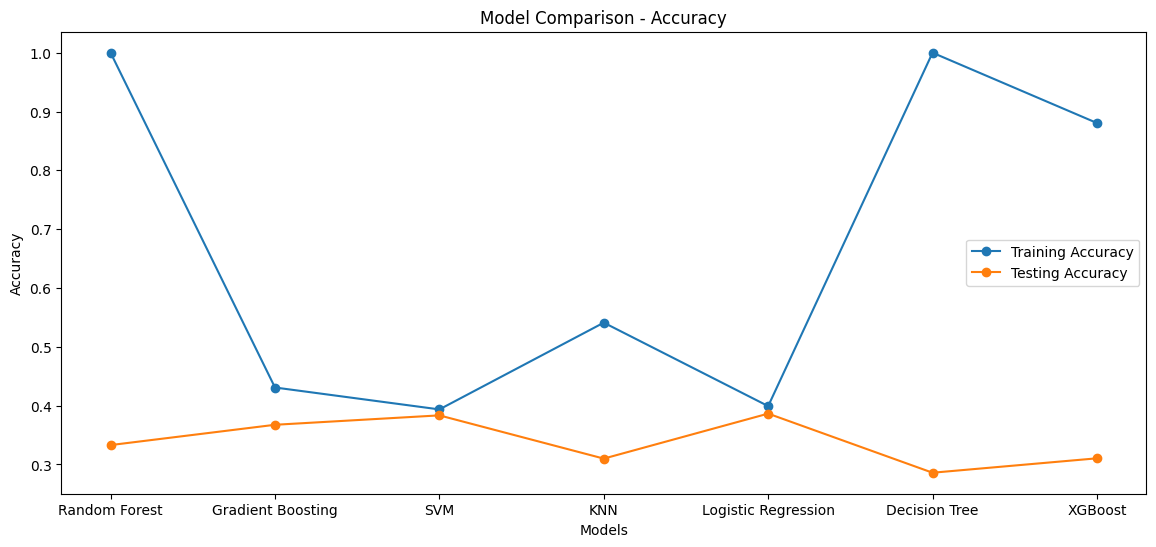

In [98]:
# Visualization: Training and Testing Accuracies
plt.figure(figsize=(14, 6))
plt.plot(list(train_accuracies.keys()), list(train_accuracies.values()), label="Training Accuracy", marker='o')
plt.plot(list(test_accuracies.keys()), list(test_accuracies.values()), label="Testing Accuracy", marker='o')
plt.title("Model Comparison - Accuracy")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.legend()
plt.show()